<a href="https://colab.research.google.com/github/dharapatel2908/Oasis-Internship/blob/main/Task-3/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


# **Loading the Dataset**

In [ ]:
from google.colab import files
data = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
data = pd.read_csv('Advertising.csv')

# **Preprocessing the Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.shape

(200, 5)

In [ ]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# **Exploratory Data Analysis**

In [ ]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

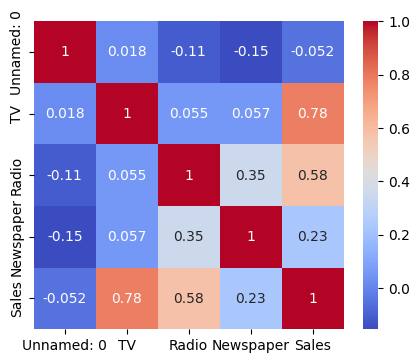

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='coolwarm')

<function matplotlib.pyplot.show(close=None, block=None)>

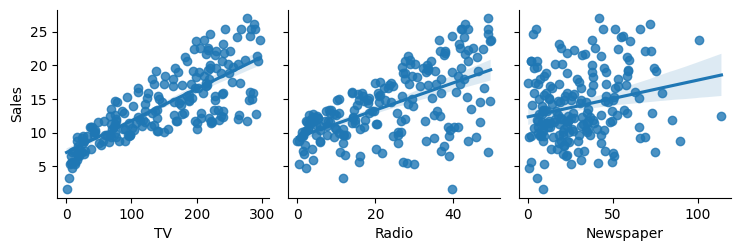

In [ ]:
sns.pairplot(data = data,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show

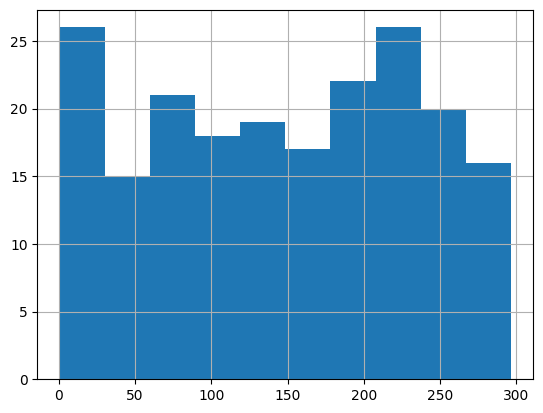

In [ ]:
data['TV'].hist()
plt.show()

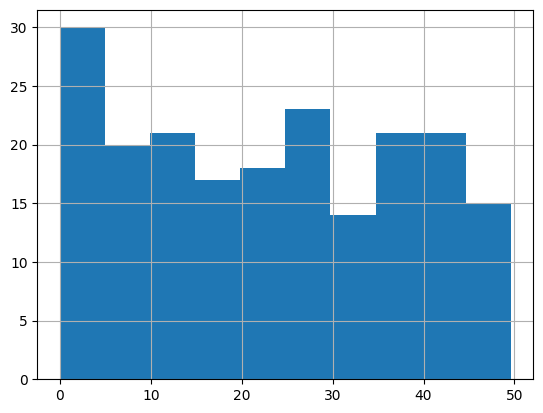

In [ ]:
data['Radio'].hist()
plt.show()

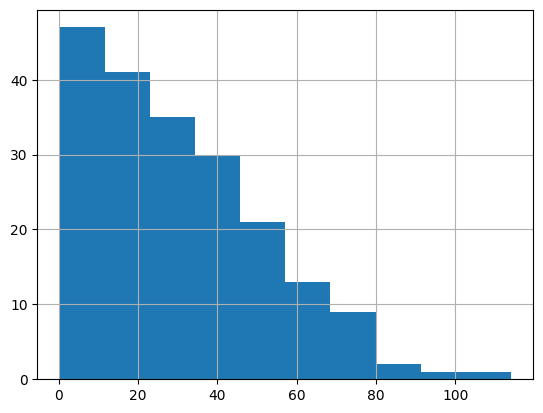

In [ ]:
data['Newspaper'].hist()
plt.show()

# **Model Training**

In [ ]:
X = data.drop(columns='Sales',axis=1)
Y = data['Sales']

In [ ]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
l = LabelEncoder()
y= l.fit_transform(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

LinearRegression
Mean Squared Error: 79.81339035669308
R2 Score: 0.9069014459854274
Cross-Validation R2: 0.9058281039978935


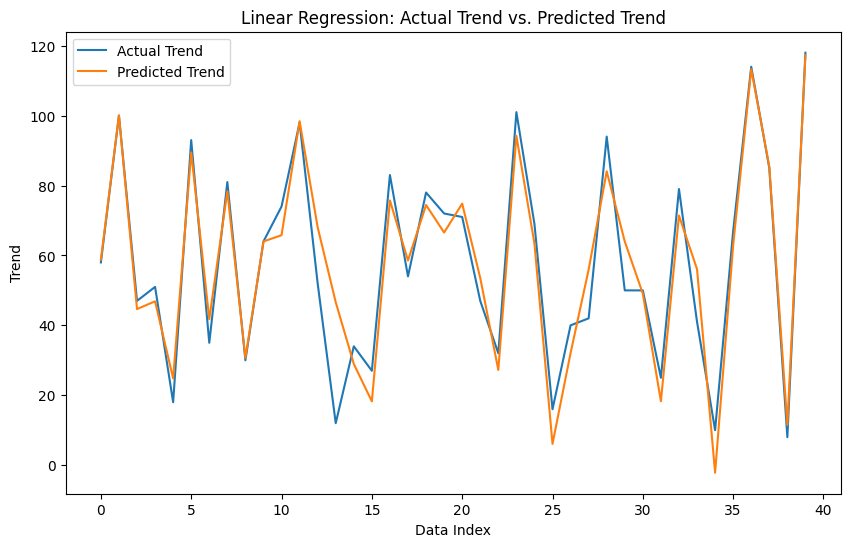

In [ ]:
Linear_Reg= LinearRegression()
Linear_Reg.fit(X_train_scaled,y_train)
y_pred = Linear_Reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(Linear_Reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("LinearRegression")
print("Mean Squared Error: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Cross-Validation R2: {}".format(cv_scores.mean()))
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Linear Regression: Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()

In [ ]:
Ridge_Reg= Ridge()
Ridge_Reg.fit(X_train_scaled,y_train)
y_pred = Ridge_Reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(Ridge_Reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("Ridge Regression")
print("Mean Squared Error: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Cross-Validation R2: {}".format(cv_scores.mean()))
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Ridge Regression: Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()

Ridge Regression
Mean Squared Error: 83.11407184204282
R2 Score: 0.9030513567688757
Cross-Validation R2: 0.899473931624496


Lasso Regression
Mean Squared Error: 92.724339825027
R2 Score: 0.891841432608157
Cross-Validation R2: 0.8840005343453953


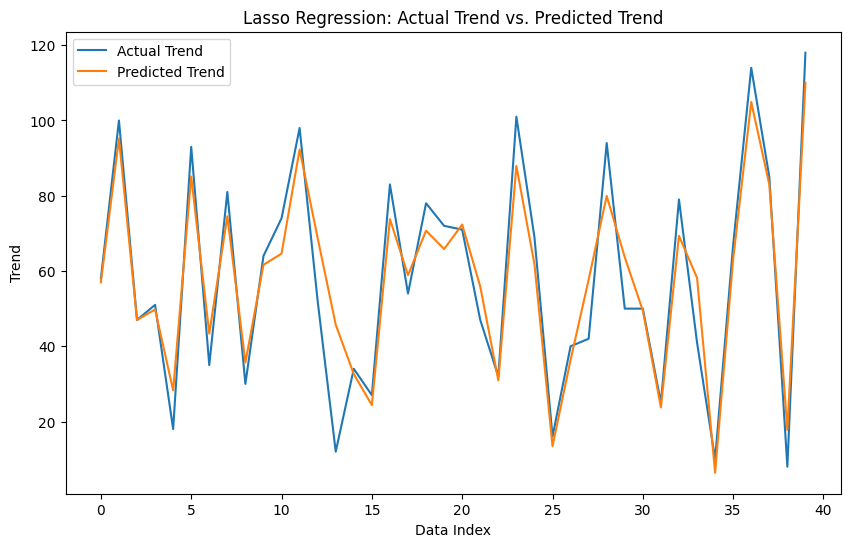

In [ ]:
Lasso_Reg= Lasso()
Lasso_Reg.fit(X_train_scaled,y_train)
y_pred = Lasso_Reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(Lasso_Reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("Lasso Regression")
print("Mean Squared Error: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Cross-Validation R2: {}".format(cv_scores.mean()))
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Lasso Regression: Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()